# Assignment 3

*Objectives*: Wrangle a data set using two new tools, [Trifacta Wrangler](https://www.trifacta.com/products/wrangler/) and [Apache Spark](https://spark.apache.org/).  Results should include a cleaned-up data set and summary statistics.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with clear responses, with shell commands and markdown cells explaining your work as appropriate in the cells provided (as more as needed).  The notebook itself should be completely reproducible (using AWS an EC2 instance based on the class AMI) from start to finish; another person should be able to use the code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking where required.

*Attestation*: **Work individually**.  At the end of your submitted notebook, state that you did all of the substantial work on this assignment yourself, and acknowledge any assistance you received.

*Deadline*: Sunday, October 22, 12pm.  Zip your notebook and wrangled dataset and submit it to Blackboard as a single file.

Name : Jiwei Zeng

## Part 1 - Wrangle a dataset with Trifacta

For this part, select a dataset from the [OKFN US City Open Data Census](http://us-city.census.okfn.org/).  Choose one according to your interest, but try to choose one that's "green" and has somewhere between 10,000 and 1,000,000 rows.  Try to choose a dataset that is less than 50MB (to save your instructors some time and space during grading!).

Document your process by answering each of the following questions.

### Q1.1 - Choose your dataset

Which dataset did you choose?  What is it called, and what is it about?  Provide a link to its main web page (not its data link, which you'll include next).

**Answer**

I choose city crime report dataset of Austin, TX. It is called Austin, TX / Crime / 2016 and it is about APD Incident Extract YTD.

https://data.austintexas.gov/Public-Safety/APD-Incident-Extract-YTD/b4y9-5x39

http://us-city.census.okfn.org/entry/austin/crime-stats

### Q1.2 - Get your data

Use `wget` to download your data onto your instance. 

**Answer**

In [4]:
!wget https://data.austintexas.gov/api/views/b4y9-5x39/rows.csv?accessType=DOWNLOAD

--2017-10-27 03:54:47--  https://data.austintexas.gov/api/views/b4y9-5x39/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.68.26
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [          <=>       ]   7.07M  1.46MB/s    in 4.9s    

Last-modified header invalid -- time-stamp ignored.
2017-10-27 03:54:52 (1.45 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [7415776]



I want to use the API to download data, but there is some wrong with the document downloaded from API and it only contains 1000 rows. So I copy the download link to download the data and the name will be changed later.

### Q1.3 - Explore your data

Use command line tools of your choice (CSVKit, XSV, or other UNIX commands we've seen in class already) to explore your data.  How long is it?  Does it seem relatively clean, or do you see data issues that need wrangling?

**Answer**

In [5]:
!mv rows.csv?accessType=DOWNLOAD austin_crime.csv

In [2]:
!csvcut -n austin_crime.csv 

  1: Incident Report Number
  2: Crime Type
  3: Date
  4: Time
  5: LOCATION_TYPE
  6: ADDRESS
  7: LONGITUDE
  8: LATITUDE
  9: Location 1


In [6]:
!wc -l austin_crime.csv

95669 austin_crime.csv


In [5]:
!csvcut austin_crime.csv | csvstat

  1. Incident Report Number
	<class 'int'>
	Nulls: False
	Min: 20163
	Max: 2016166900081
	Sum: 1541303244526455
	Mean: 16110959197.709318
	Median: 20161800503.0
	Standard Deviation: 44659482258.42918
	Unique values: 95668
  2. Crime Type
	<class 'str'>
	Nulls: False
	Unique values: 409
	5 most frequent values:
		CRASH/LEAVING THE SCENE:	7778
		THEFT:	6415
		FAMILY DISTURBANCE:	6036
		BURGLARY OF VEHICLE:	5269
		CRIMINAL TRESPASS NOTICE:	4295
	Max length: 30
  3. Date
	<class 'datetime.date'>
	Nulls: False
	Min: 2015-02-18
	Max: 2016-08-17
	Unique values: 475
	5 most frequent values:
		2016-01-01:	521
		2016-02-01:	505
		2016-03-15:	503
		2016-04-29:	499
		2016-06-30:	497
  4. Time
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 2359
	Sum: 125863239
	Mean: 1315.6252769996238
	Median: 1403.0
	Standard Deviation: 687.4753949274276
	Unique values: 1440
	5 most frequent values:
		1200:	3048
		0:	1713
		1800:	1214
		2200:	1178
		1700:	1039
  5. LOCATION_TYPE
	<class 'NoneType'>
	Nulls: True
	Valu

There are 9 columns in the data. And there are too much values of null in columns of LOCATION_TYPE, LONGITUDE, LATITUDE and Location 1. I believe it needs wrangling.

### Q1.4 - Wrangle your data with Trifacta

Use Trifacta to import your data.  Find at least two columns you want to wrangle and clean them up - you can split values into new columns, remove bad values, whatever you like.

Execute your recipe, generating a summary you can review, and save your recipe.

Paste your recipe into the cell below using the markdown provided.

**Answer**

```

splitrows col: column1 on: '\n'
split col: column1 on: ',' limit: 8 quote: '\"'
header
drop col: LONGITUDE
drop col: LATITUDE
drop col: Location_1
drop col: LOCATION_TYPE

```

### Q1.5 - Evaluate

How did it go?  Did your recipe work on the whole dataset?  Did you run into any problems?

**Answer**

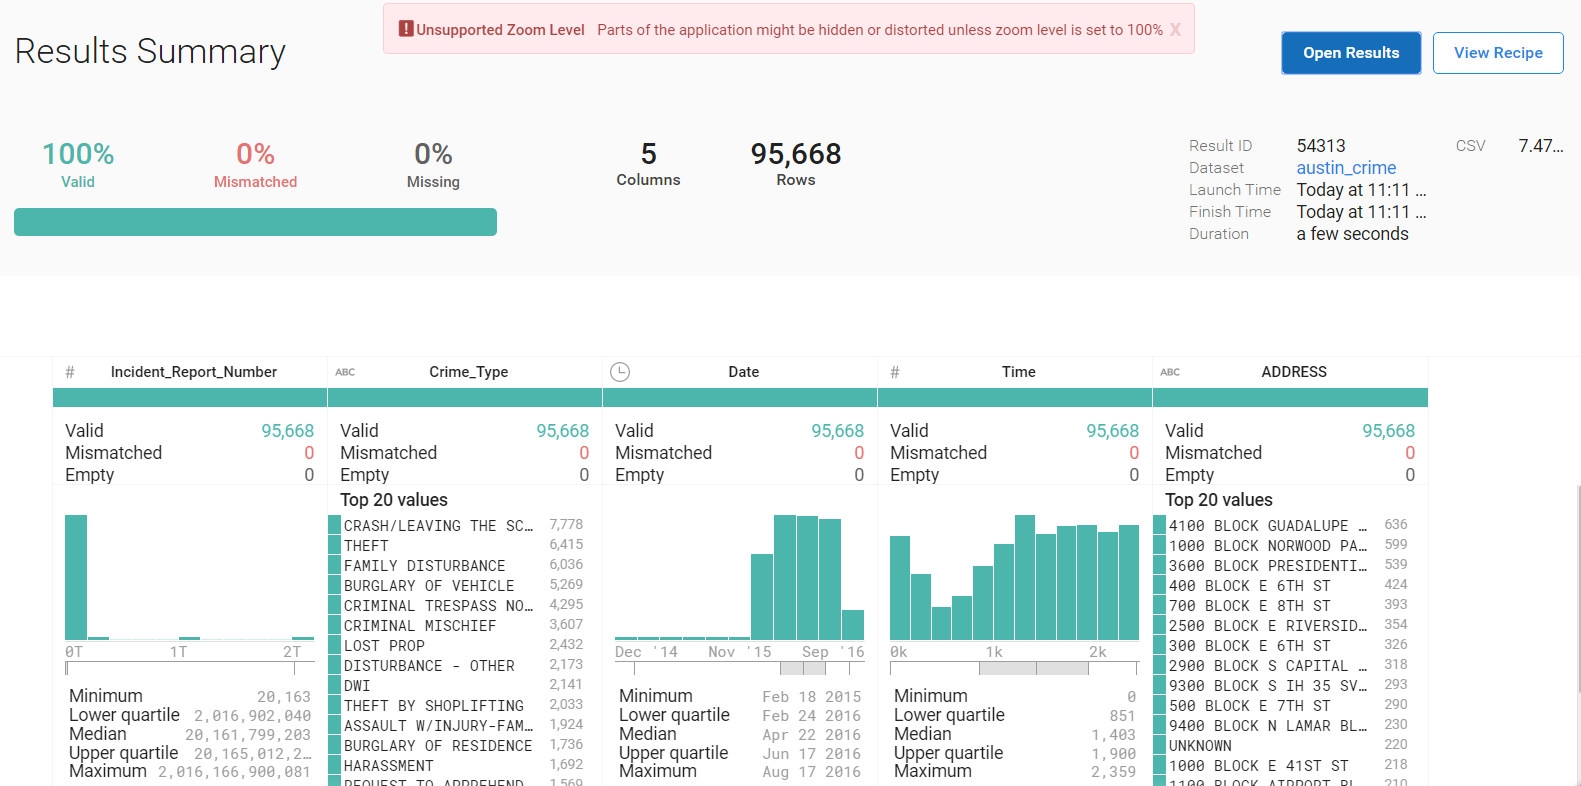

Yes, it works. But I met the problem that all of my results are in double quotation, and they cannot be converted into integer. Thanks to Professor Tong, I solved the problem. 

## Part 2 - Summary statistics with Spark

Use Spark to load your data and compute basic summary statistics (counts, or average, min/max, and mean).  You may borrow liberally from the example we saw in class, just change a few things as appropriate.

This is just to get you a taste... we'll do more with Spark next week and in Project 3.

### Q2.1 - Start Spark

First, load up Spark by executing the following cells.  You can just execute them!

In [1]:
import os

In [2]:
os.environ['SPARK_HOME'] = '/usr/local/lib/spark'

In [3]:
import findspark

In [4]:
findspark.init()

In [5]:
from pyspark import SparkContext

In [6]:
spark = SparkContext(appName='assignment-3')

In [7]:
spark

<SparkContext master=local[*] appName=assignment-3>

If it worked, you should see the description of your **SparkContext** and a link (that you can visit by replacing its IP address with your EC2 instance host name).

### Q2.2 - Upload your wrangled data

Upload the data you wrangled with Trifacta in Part 1.  You may use Jupyter's upload function for this, it doesn't need to be captured here.  You may want to compress your data before uploading it.

In a few cells below, ensure that your data uploaded correctly, and uncompress it if necessary.  Count its lines, check its filesize, or look at the first few lines as you deem appropriate until you're confident you have all your data to use here in the notebook.

**Answer**

In [93]:
!csvcut -n austin_crime.csv 

  1: Incident.Report.Number
  2: Crime.Type
  3: Date
  4: Time
  5: ADDRESS


In [94]:
!wc -l austin_crime.csv

95669 austin_crime.csv


In [8]:
!csvcut austin_crime.csv| head

Incident_Report_Number,Crime_Type,Date,Time,ADDRESS
2016611196,ROBBERY BY THREAT,03/01/2016,1655,1100 BLOCK AIRPORT BLVD
20161270664,ROBBERY INFORMATION,05/05/2016,2300,2300 BLOCK ROSEWOOD AVE
2016740187,ROBBERY BY ASSAULT,03/14/2016,130,7000 BLOCK GUADALUPE ST
20161140148,ROBBERY BY ASSAULT,04/23/2016,125,1500 BLOCK WICKERSHAM LN
20162070692,AGG ROBBERY/DEADLY WEAPON,07/25/2016,1253,7300 BLOCK CAMERON RD
20161980510,ROBBERY INFORMATION,07/16/2016,828,3500 BLOCK ROGGE LN
20165020470,PROMOTION OF PROSTITUTION,05/17/2016,1426,1500 BLOCK RUTHERFORD LN
2016380817,ASSAULT INFORMATION,02/07/2016,1307,6400 BLOCK E US 290 HWY SVRD WB
20165017472,DISTURBANCE - OTHER,04/27/2016,0,6100 BLOCK N IH 35 SVRD NB


It is same as the previous result, so the file is correct.

### Q2.3 - Load your data into a Spark RDD

Load up your data using the techniques we reviewed in class.  Extract the header. Get a count to verify that it's working correctly.

Modify the cells below to get started.

**Answer**

In [9]:
data = spark.textFile('austin_crime.csv')

In [10]:
header = data.first()
header

'"Incident_Report_Number","Crime_Type","Date","Time","ADDRESS"'

In [11]:
data.count()

95669

### Q2.4 - Summarize your data

Choose one of the two techniques we saw in class to compute some basic numbers on one of your columns.  Your options are:

 * Use `map` and `filter` and `reduceByKey` with `lambda` functions find min/max values and to count frequencies in one column
 * Use the `Statistics` module to compute count, mean, min/max (don't forget to import it and numpy)
 
It's your choice.

**Answer**

In [12]:
data.take(5)

['"Incident_Report_Number","Crime_Type","Date","Time","ADDRESS"',
 '"2016611196","ROBBERY BY THREAT","03/01/2016","1655","1100 BLOCK AIRPORT BLVD"',
 '"20161270664","ROBBERY INFORMATION","05/05/2016","2300","2300 BLOCK ROSEWOOD AVE"',
 '"2016740187","ROBBERY BY ASSAULT","03/14/2016","130","7000 BLOCK GUADALUPE ST"',
 '"20161140148","ROBBERY BY ASSAULT","04/23/2016","125","1500 BLOCK WICKERSHAM LN"']

In [42]:
crime_data = data.filter(lambda row: row != header) \
    .map(lambda row: row.split(","))

In [43]:
crime_data.take(5)

[['"2016611196"',
  '"ROBBERY BY THREAT"',
  '"03/01/2016"',
  '"1655"',
  '"1100 BLOCK AIRPORT BLVD"'],
 ['"20161270664"',
  '"ROBBERY INFORMATION"',
  '"05/05/2016"',
  '"2300"',
  '"2300 BLOCK ROSEWOOD AVE"'],
 ['"2016740187"',
  '"ROBBERY BY ASSAULT"',
  '"03/14/2016"',
  '"130"',
  '"7000 BLOCK GUADALUPE ST"'],
 ['"20161140148"',
  '"ROBBERY BY ASSAULT"',
  '"04/23/2016"',
  '"125"',
  '"1500 BLOCK WICKERSHAM LN"'],
 ['"20162070692"',
  '"AGG ROBBERY/DEADLY WEAPON"',
  '"07/25/2016"',
  '"1253"',
  '"7300 BLOCK CAMERON RD"']]

In [44]:
crime_times_v1 = crime_data.map(lambda cols: cols[3])

In [45]:
crime_times_v1.take(5)

['"1655"', '"2300"', '"130"', '"125"', '"1253"']

In [46]:
crime_times=crime_times_v1.map(lambda row:int(row[1:-1]))

In [47]:
crime_times.take(5)

[1655, 2300, 130, 125, 1253]

In [28]:
from pyspark.mllib.stat import Statistics

In [29]:
import numpy as np

In [30]:
crime_times_stats = Statistics.colStats(crime_times.map(lambda r: np.array(r)))

In [31]:
crime_times_stats.mean()

array([ 1315.625277])

In [32]:
crime_times_stats.min()

array([ 0.])

In [33]:
crime_times_stats.max()

array([ 2359.])

In [34]:
%timeit crime_times_stats.count()

74.6 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [110]:
crime_times_stats.variance()

array([ 472627.35891744])

### Q2.5 - Evaluate

How did it go?  Did it work as you expected?  Did you run into any issues?

What do you like about using Spark?  Or do you dislike it?

**Answer**

I think it is a comlicated but useful method. I am not familiar with it and often run into problems. The biggest problem for me is that I don't know how to use other functions in the lambda and map, which requires me to explore more in the spark. 
If I can run into less problems, I would like it more:).